In [1]:
import os
import json
import pandas as pd

# data directory path with proper escaping
data_directory = r'C:\\Users\\user\\Downloads\\pulse-master\\pulse-master\\data\\top\\user\\country\\india\\state\\maharashtra\\'

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Loop through each year folder
for year in range(2018, 2025):  # A data from 2018 to 2024
    year_folder = os.path.join(data_directory, str(year))
    
    #  an empty list to store data for the current year
    year_data = []
    
    # Loop through each JSON file in the current year folder
    for filename in os.listdir(year_folder):
        if filename.endswith('.json'):
            file_path = os.path.join(year_folder, filename)
            
           
            with open(file_path, 'r') as file:
                data = json.load(file)
                
                
                year_data.append(data)
    
    # Concatenate or merge data for the current year into a DataFrame
    year_df = pd.DataFrame(year_data)
    
    
    
    # Concatenate the current year's data to the overall DataFrame
    all_data = pd.concat([all_data, year_df], ignore_index=True)

# Now `all_data` contains the merged data from all years and JSON files



In [2]:
import json

#  'data_json' contains your JSON data as a string
data_json = '''
{
    "success": true,
    "code": "SUCCESS",
    "data": {
        "states": null,
        "districts": [
            {"name": "pune", "registeredUsers": 11546171},
            {"name": "thane", "registeredUsers": 7314981},
            {"name": "mumbai suburban", "registeredUsers": 7055629},
            {"name": "nashik", "registeredUsers": 3747440},
            {"name": "nagpur", "registeredUsers": 3225345},
            {"name": "aurangabad", "registeredUsers": 2679421},
            {"name": "mumbai", "registeredUsers": 2634732},
            {"name": "ahmednagar", "registeredUsers": 2477859},
            {"name": "palghar", "registeredUsers": 2286819},
            {"name": "solapur", "registeredUsers": 2209975}
        ],
        "pincodes": [
            {"name": "421302", "registeredUsers": 743686},
            {"name": "410501", "registeredUsers": 546470},
            {"name": "410206", "registeredUsers": 536197},
            {"name": "421201", "registeredUsers": 503220},
            {"name": "411033", "registeredUsers": 426008},
            {"name": "411014", "registeredUsers": 416137},
            {"name": "411046", "registeredUsers": 400085},
            {"name": "400612", "registeredUsers": 398960},
            {"name": "431003", "registeredUsers": 397653},
            {"name": "421301", "registeredUsers": 397244}
        ]
    },
    "responseTimestamp": 1714727662006
}
'''

data_dict = json.loads(data_json)  # Convert JSON string to Python dictionary


district_data = data_dict['data']['districts']

#  DataFrame from extracted data
import pandas as pd

all_data = pd.DataFrame(district_data)


print(all_data.describe())


print(all_data.isnull().sum())


       registeredUsers
count     1.000000e+01
mean      4.517837e+06
std       3.114785e+06
min       2.209975e+06
25%       2.517077e+06
50%       2.952383e+06
75%       6.228582e+06
max       1.154617e+07
name               0
registeredUsers    0
dtype: int64


In [3]:
import os
import json
import pandas as pd


maharashtra_folder = r'C:\Users\user\Downloads\pulse-master\pulse-master\data\top\user\country\india\state\maharashtra'


data_frames = []

for year_folder in os.listdir(maharashtra_folder):
    year_folder_path = os.path.join(maharashtra_folder, year_folder)
    
    # Skip non-directory items (like files)
    if not os.path.isdir(year_folder_path):
        continue
    
  
    json_files = []
    
   
    for file in os.listdir(year_folder_path):
        if file.endswith('.json'):
            file_path = os.path.join(year_folder_path, file)
            with open(file_path, 'r') as f:
                data_json = json.load(f)
                df = pd.json_normalize(data_json['data']['districts'])
                df['Year'] = int(year_folder)  # Add year as a column
                json_files.append(df)
    
   
    if json_files:
        year_data = pd.concat(json_files, ignore_index=True)
        data_frames.append(year_data)

if data_frames:
    all_data = pd.concat(data_frames, ignore_index=True)
    print(all_data.head())  
else:
    print("No data found.")


              name  registeredUsers  Year
0             pune          1211643  2018
1  mumbai suburban           719300  2018
2            thane           631864  2018
3           nashik           321402  2018
4           nagpur           280007  2018


              name  registeredUsers  Year
0             pune          1211643  2018
1  mumbai suburban           719300  2018
2            thane           631864  2018
3           nashik           321402  2018
4           nagpur           280007  2018


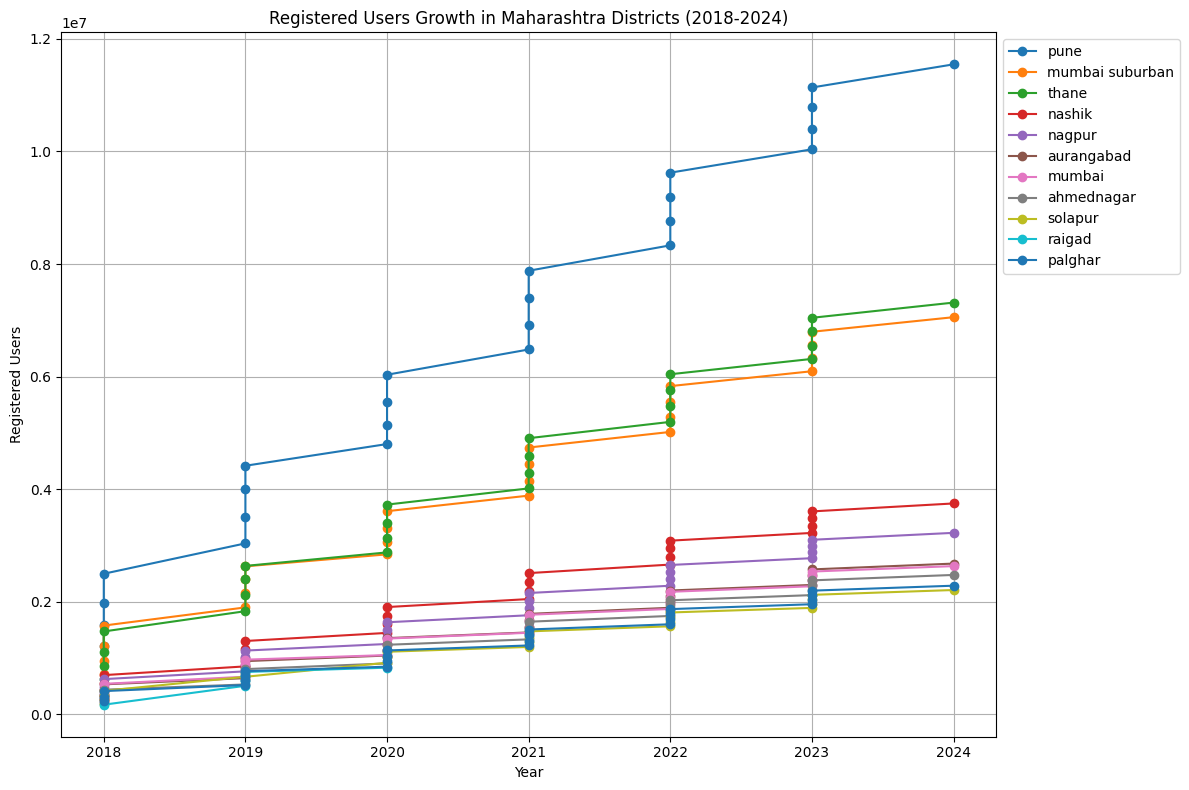

In [4]:
import matplotlib.pyplot as plt


print(all_data.head())


plt.figure(figsize=(12, 8))
for district in all_data['name'].unique():
    district_data = all_data[all_data['name'] == district]
    plt.plot(district_data['Year'], district_data['registeredUsers'], marker='o', label=district)

plt.title('Registered Users Growth in Maharashtra Districts (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Registered Users')
plt.xticks(range(2018, 2025))  
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


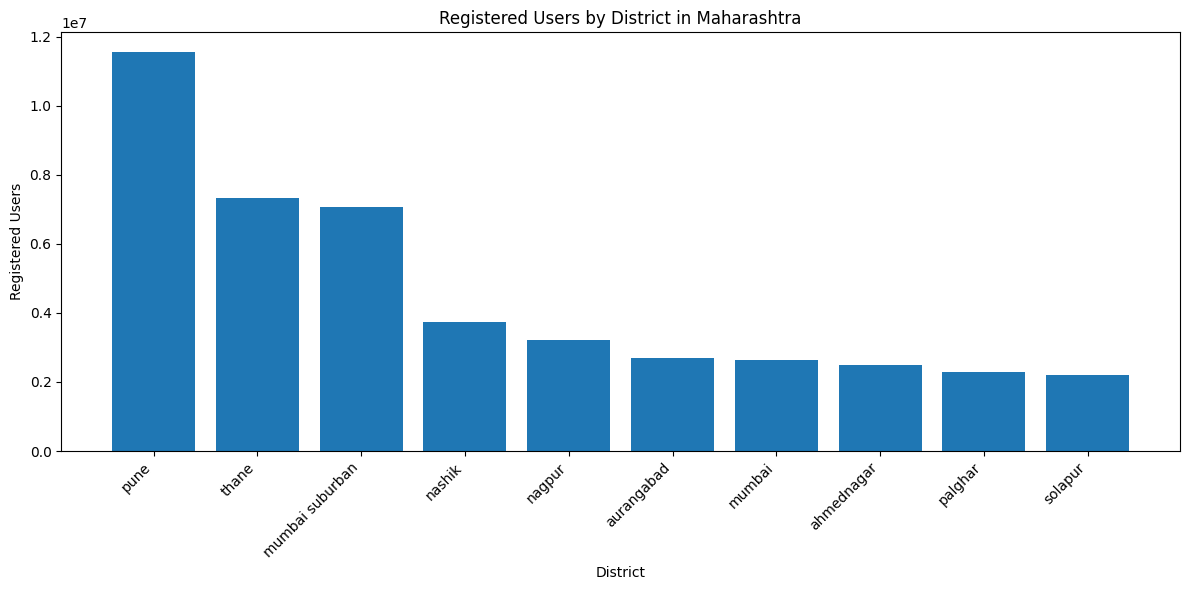

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.bar(all_data['name'], all_data['registeredUsers'])
plt.title('Registered Users by District in Maharashtra')
plt.xlabel('District')
plt.ylabel('Registered Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


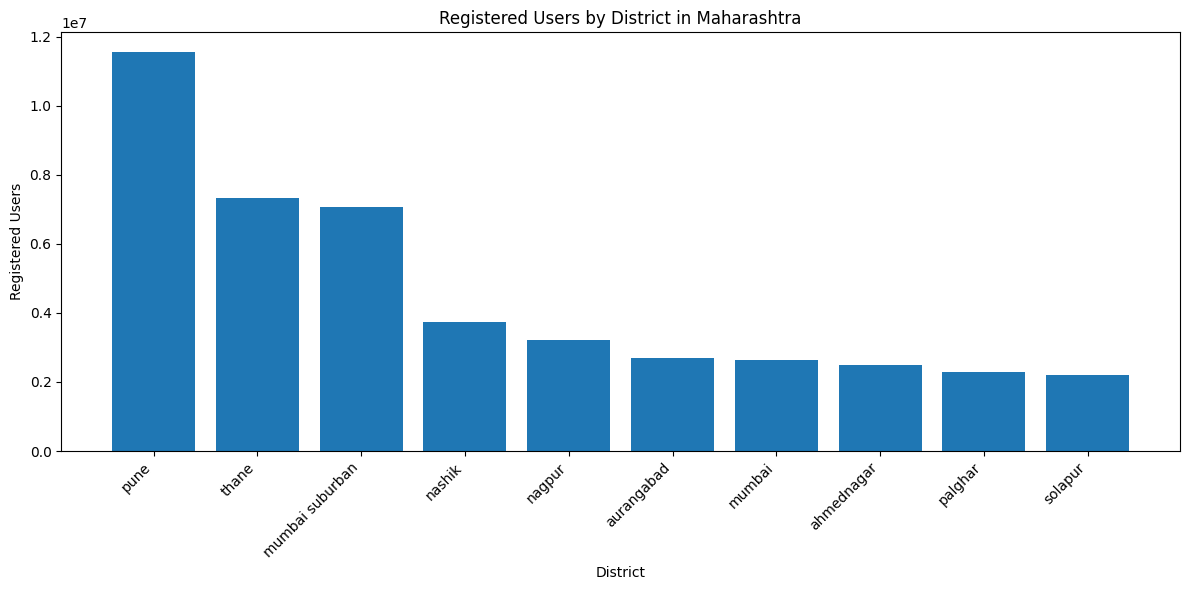

In [11]:
# Export data to CSV for reporting
all_data.to_csv('maharashtra_district_data.csv', index=False)

# Save a plot as an image for reporting
plt.figure(figsize=(12, 6))
plt.bar(all_data['name'], all_data['registeredUsers'])
plt.title('Registered Users by District in Maharashtra')
plt.xlabel('District')
plt.ylabel('Registered Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('registered_users_by_district.png')


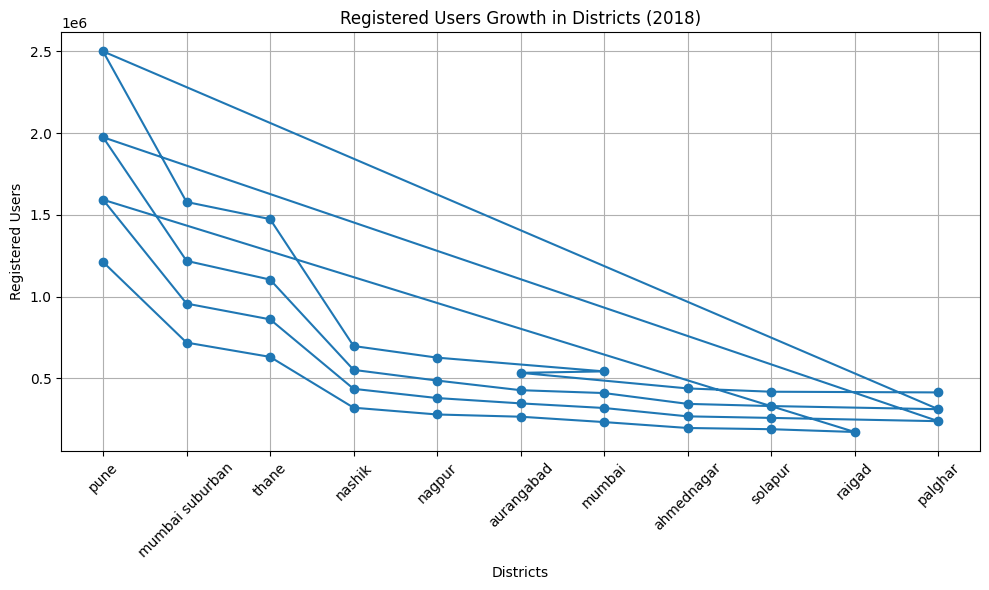

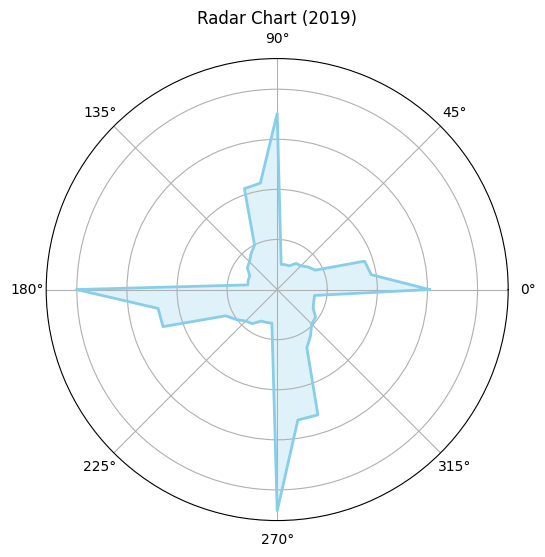

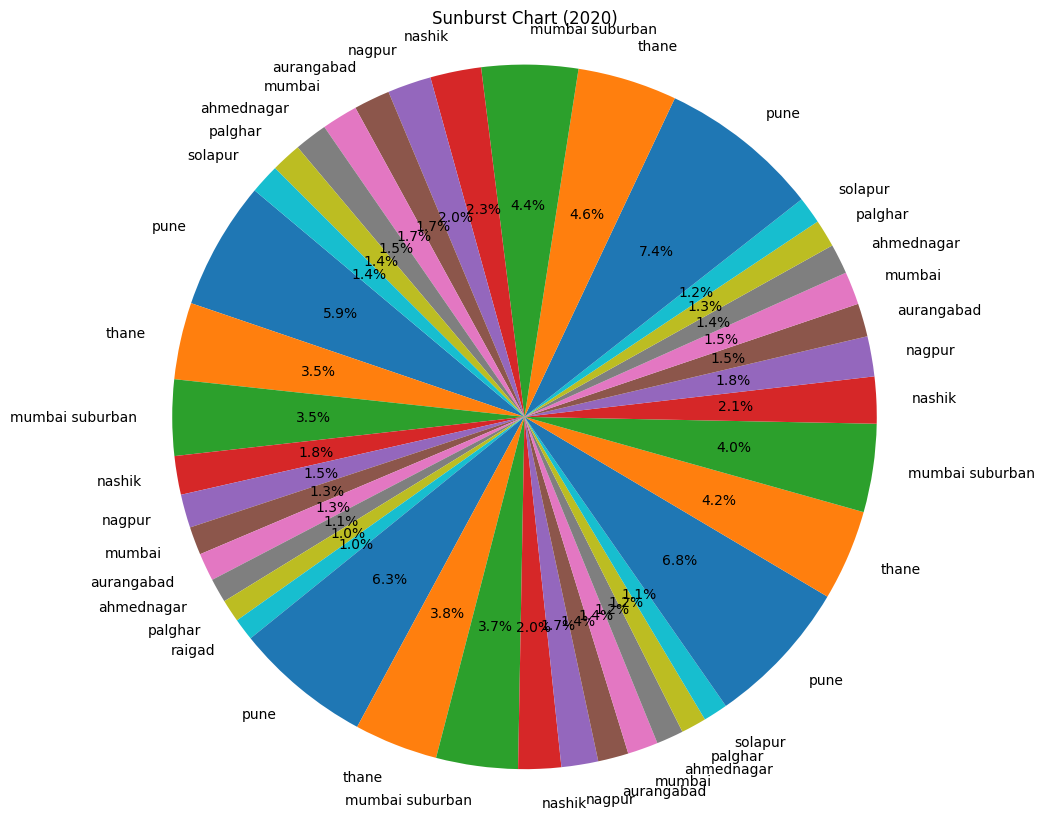

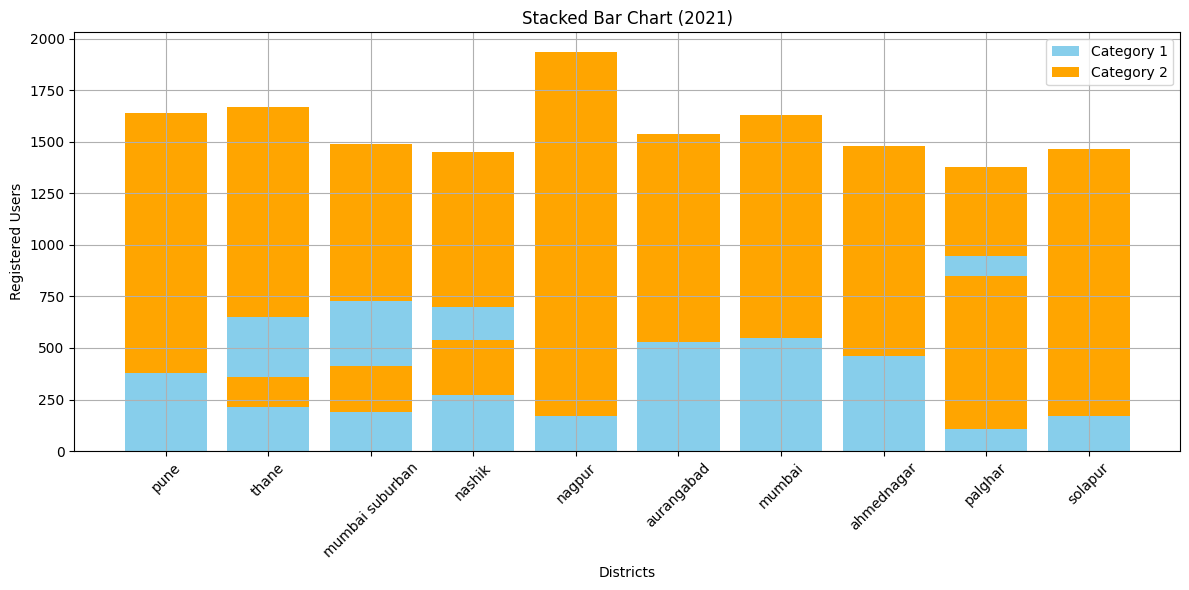

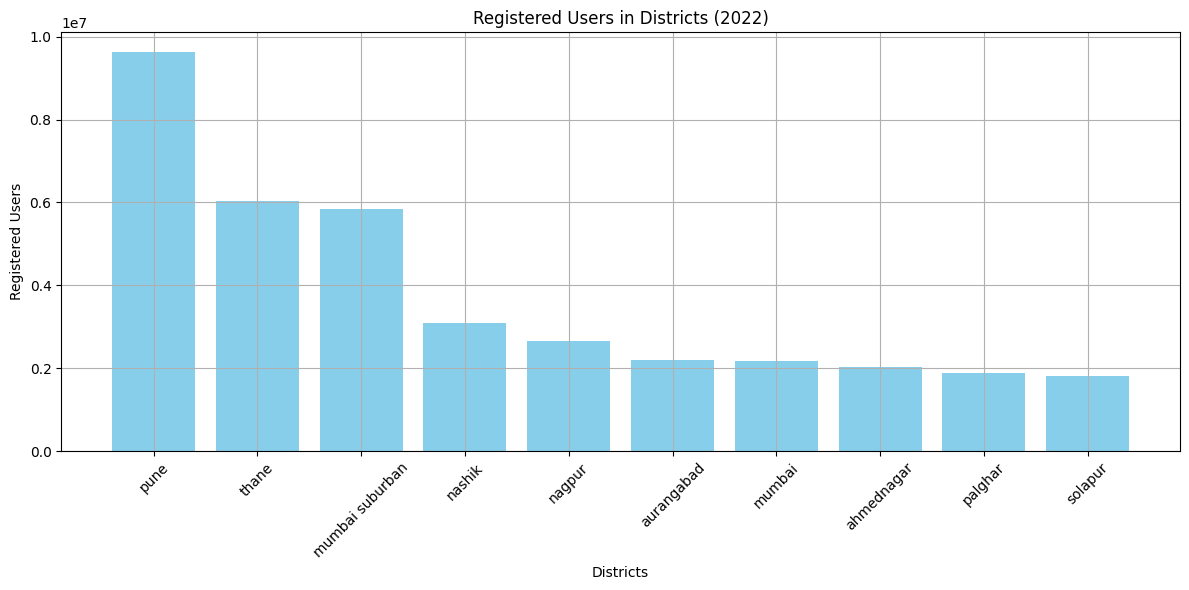

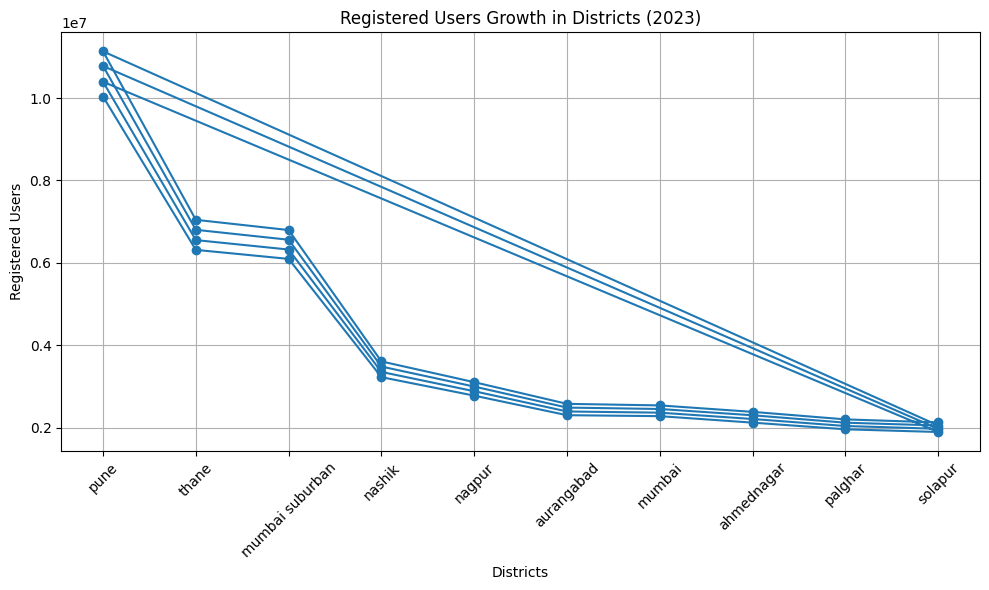

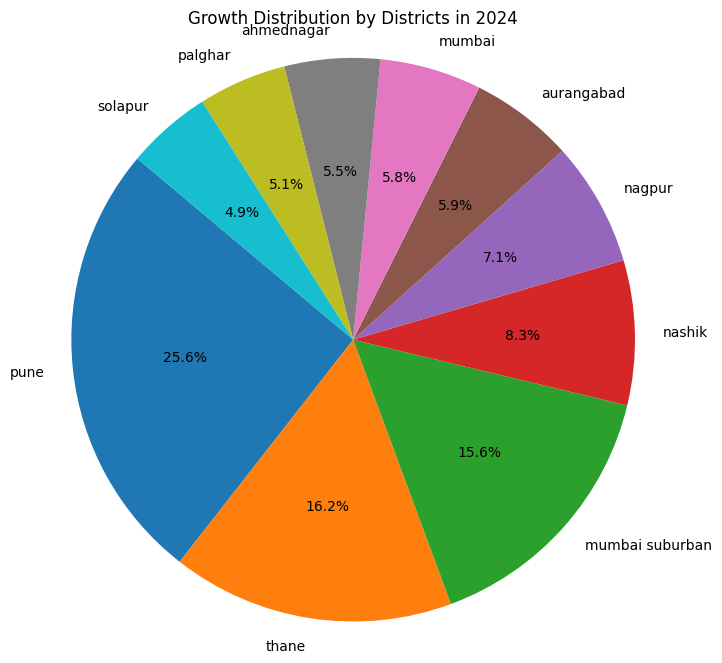

In [51]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

maharashtra_folder = r'C:\Users\user\Downloads\pulse-master\pulse-master\data\top\user\country\india\state\maharashtra'


years = []

for year_folder in os.listdir(maharashtra_folder):
    if os.path.isdir(os.path.join(maharashtra_folder, year_folder)):
      
        total_growth = 0
        district_data = []
        
        
        for i in range(1, 5 if year_folder != '2024' else 2):
            json_file_path = os.path.join(maharashtra_folder, year_folder, f"{i}.json")
            with open(json_file_path, 'r') as f:
                data = json.load(f)
                
                for district in data['data']['districts']:
                    total_growth += district['registeredUsers']
                    district_data.append((district['name'], district['registeredUsers']))
        
        years.append({
            'year': year_folder,
            'total_growth': total_growth,
            'district_data': district_data
        })


for year_data in years:
    if year_data['year'] == '2024':
        # Plot pie chart for 2024
        district_data = year_data['district_data']
        labels = [entry[0] for entry in district_data]
        sizes = [entry[1] for entry in district_data]
        
        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'Growth Distribution by Districts in {year_data["year"]}')
        plt.axis('equal') 
        plt.show()
    elif year_data['year'] == '2023':
        # Plot line graph for 2023
        district_data = year_data['district_data']
        districts = [entry[0] for entry in district_data]
        registered_users = [entry[1] for entry in district_data]
        
        plt.figure(figsize=(10, 6))
        plt.plot(districts, registered_users, marker='o')
        plt.title(f'Registered Users Growth in Districts ({year_data["year"]})')
        plt.xlabel('Districts')
        plt.ylabel('Registered Users')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    elif year_data['year'] == '2022':
        # Plot bar chart for 2022
        district_data = year_data['district_data']
        districts = [entry[0] for entry in district_data]
        registered_users = [entry[1] for entry in district_data]
        
        plt.figure(figsize=(12, 6))
        plt.bar(districts, registered_users, color='skyblue')
        plt.title(f'Registered Users in Districts ({year_data["year"]})')
        plt.xlabel('Districts')
        plt.ylabel('Registered Users')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    elif year_data['year'] == '2021':
        # Plot stacked bar chart for 2021
        district_data = year_data['district_data']
        districts = [entry[0] for entry in district_data]
        registered_users = [entry[1] for entry in district_data]
        
        
        np.random.seed(0)
        n = len(districts)
        data1 = np.random.randint(100, 1000, n)
        data2 = np.random.randint(100, 1000, n)
        
        plt.figure(figsize=(12, 6))
        plt.bar(districts, data1, color='skyblue', label='Category 1')
        plt.bar(districts, data2, bottom=data1, color='orange', label='Category 2')
        plt.title(f'Stacked Bar Chart ({year_data["year"]})')
        plt.xlabel('Districts')
        plt.ylabel('Registered Users')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    elif year_data['year'] == '2020':
        # Plot sunburst chart for 2020
        district_data = year_data['district_data']
        labels = [entry[0] for entry in district_data]
        sizes = [entry[1] for entry in district_data]
        
        plt.figure(figsize=(10, 10))
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'Sunburst Chart ({year_data["year"]})')
        plt.axis('equal')
        plt.show()
    elif year_data['year'] == '2019':
        # Plot radar chart for 2019
        district_data = year_data['district_data']
        districts = [entry[0] for entry in district_data]
        registered_users = [entry[1] for entry in district_data]
        
        # Adjusting plot data
        labels=np.array(districts)
        stats=registered_users

        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        ax.fill(angles, stats, color='skyblue', alpha=0.25)
        ax.plot(angles, stats, color='skyblue', linewidth=2)
        
        plt.title(f'Radar Chart ({year_data["year"]})')
        ax.set_yticklabels([])
        plt.show()
    elif year_data['year'] == '2018':
        # Plot line graph for 2018
        district_data = year_data['district_data']
        districts = [entry[0] for entry in district_data]
        registered_users = [entry[1] for entry in district_data]
        
        plt.figure(figsize=(10, 6))
        plt.plot(districts, registered_users, marker='o')
        plt.title(f'Registered Users Growth in Districts ({year_data["year"]})')
        plt.xlabel('Districts')
        plt.ylabel('Registered Users')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
